Project: Amazon Price Dataset
=======

ProPublica reporters examined Amazon’s shopping algorithm. We scraped data from the company's website to examine listings for 250 best-selling products across a wide range of categories, from electronics to household supplies, over a period of several weeks during summer 2016. We compared pricing and shipping costs for products offered by multiple vendors, including those sold by Amazon and sellers in the "Fulfilled by Amazon" program. In total, we examined 6,973 vendor listings.

 Objectives:
------
### 1) vendor/vendortype vs price
### 2) rank vs price
### 3) simple price prediction

# Step 1: EDA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('09-19-Amazon-Ranking-Analysis.csv')

In [3]:
df.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 14 columns):
Index                     6973 non-null int64
ProductName               6973 non-null object
ScrapeDate                6973 non-null object
ScrapedIndex              6973 non-null int64
ScrapedIndexTrueRank      6973 non-null int64
CorrectedIndexTrueRank    6973 non-null int64
ScrapedIndexPrice         6973 non-null float64
CorrectedPrice            6973 non-null float64
ScrapedIndexVendor        6973 non-null object
ScrapedIndexVendorType    6973 non-null object
BBScrapedPrice            6973 non-null float64
BBVendorType              6973 non-null object
BBVendor                  6809 non-null object
BBCorrectedPrice          6973 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 762.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,6973.0,3486.000000,2013.076046,0.00,1743.00,3486.00,5229.00,6972.00
ScrapedIndex,6973.0,25.041876,23.618871,1.00,8.00,17.00,35.00,162.00
ScrapedIndexTrueRank,6973.0,22.730962,20.520442,1.00,7.00,16.00,33.00,113.00
CorrectedIndexTrueRank,6973.0,21.559300,19.154709,1.00,7.00,16.00,31.00,107.00
ScrapedIndexPrice,6973.0,54.904896,74.293356,2.38,19.53,31.90,55.89,931.80
CorrectedPrice,6973.0,55.567631,74.476092,2.38,20.01,32.08,56.10,931.80
BBScrapedPrice,6973.0,36.295817,61.838063,-1.00,8.99,14.94,36.99,698.00
BBCorrectedPrice,6973.0,45.827961,63.889925,0.00,15.79,23.34,47.92,706.11


In [6]:
df.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [7]:
df.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [8]:
# set Index
df.set_index('Index', inplace=True)

In [9]:
# Scrapedate to datetime
df.ScrapeDate = pd.to_datetime(df.ScrapeDate)

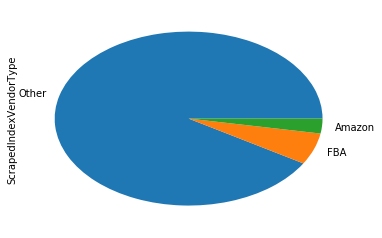

In [10]:
df.ScrapedIndexVendorType.value_counts().plot(kind='pie')

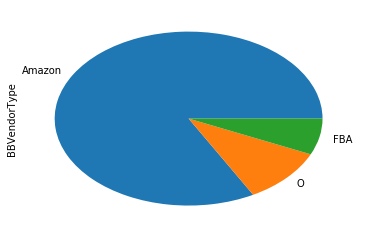

In [11]:
df.BBVendorType.value_counts().plot(kind='pie')

In [12]:
#get rid of null values
df.fillna("No Information",inplace=True)
df.isnull().sum()

ProductName               0
ScrapeDate                0
ScrapedIndex              0
ScrapedIndexTrueRank      0
CorrectedIndexTrueRank    0
ScrapedIndexPrice         0
CorrectedPrice            0
ScrapedIndexVendor        0
ScrapedIndexVendorType    0
BBScrapedPrice            0
BBVendorType              0
BBVendor                  0
BBCorrectedPrice          0
dtype: int64

In [13]:
#BBScrapedPrice seems useless.
df.drop(columns='BBScrapedPrice',inplace=True)

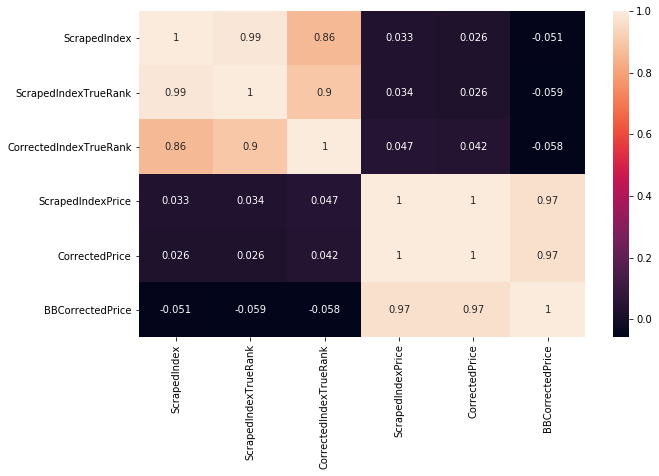

In [14]:
# correlation map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
# labeling small groups
df['BBGroup'] = df.ProductName.factorize()[0]

#### 1. mean price of each vendor types

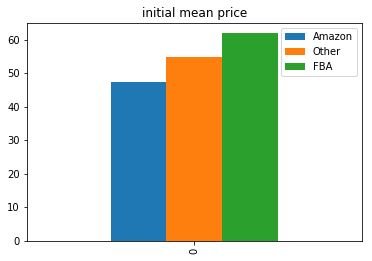

In [16]:
test_df = pd.DataFrame(data = {'Amazon':[df[df['ScrapedIndexVendorType'] == 'Amazon'].ScrapedIndexPrice.mean()]})
test_df['Other'] = df[df['ScrapedIndexVendorType'] == 'Other'].ScrapedIndexPrice.mean()
test_df['FBA'] = df[df['ScrapedIndexVendorType'] == 'FBA'].ScrapedIndexPrice.mean()
test_df.plot(kind='bar',title='initial mean price')

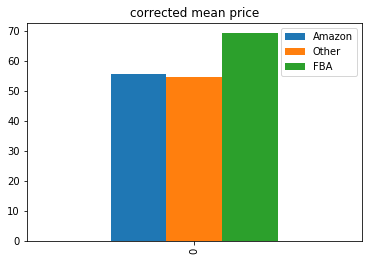

In [17]:
test_df = pd.DataFrame(data = {'Amazon':[df[df['ScrapedIndexVendorType'] == 'Amazon'].CorrectedPrice.mean()]})
test_df['Other'] = df[df['ScrapedIndexVendorType'] == 'Other'].CorrectedPrice.mean()
test_df['FBA'] = df[df['ScrapedIndexVendorType'] == 'FBA'].CorrectedPrice.mean()
test_df.plot(kind='bar',title='corrected mean price')

In [18]:
df[df['ScrapedIndexVendorType'] == 'Other'].CorrectedPrice.mean()

54.68873195229127

In [19]:
df[df['ScrapedIndexVendorType'] == 'Other'].ScrapedIndexPrice.mean()

54.68873195229127

In [20]:
df[df['ScrapedIndexVendorType'] == 'FBA'].ScrapedIndexPrice.mean()

61.83254278728606

In [21]:
df[df['ScrapedIndexVendorType'] == 'FBA'].CorrectedPrice.mean()

69.17672371638142

In [22]:
df[df['ScrapedIndexVendorType'] == 'Amazon'].ScrapedIndexPrice.mean()

47.32151041666666

In [23]:
df[df['ScrapedIndexVendorType'] == 'Amazon'].CorrectedPrice.mean()

55.745885416666674

#### 2.mean of each vendors

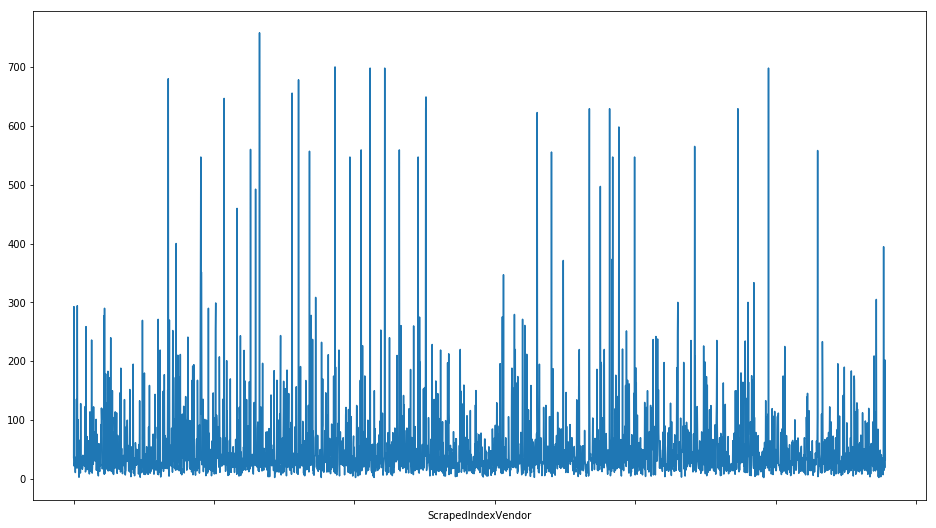

In [24]:
df.groupby('ScrapedIndexVendor').ScrapedIndexPrice.mean().plot(figsize=(16,9))

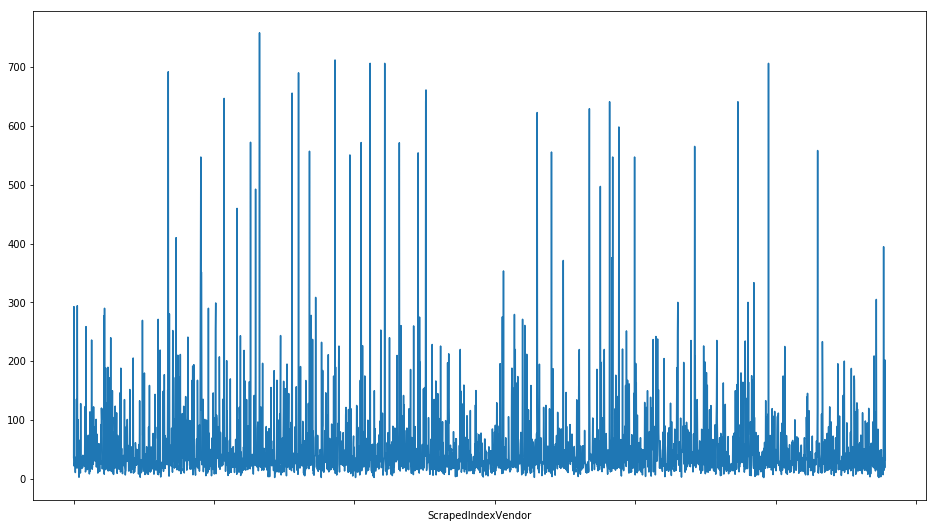

In [25]:
df.groupby('ScrapedIndexVendor').CorrectedPrice.mean().plot(figsize=(16,9))

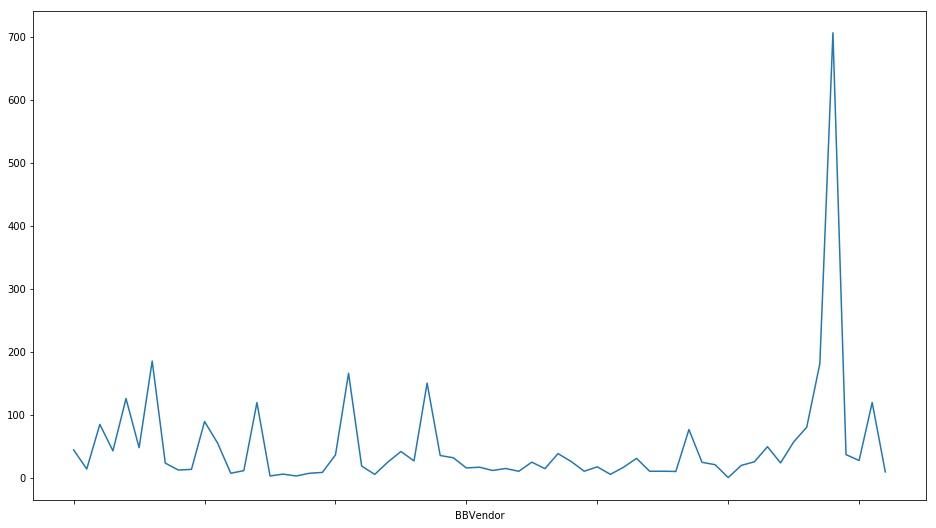

In [26]:
df.groupby('BBVendor').BBCorrectedPrice.mean().plot(figsize=(16,9))

#### 3.vendortype vs price relation

In [27]:
# mapping vendor type to numeric
df['VendorTypeNum'] = df.ScrapedIndexVendorType.map({'Amazon':0, 'FBA':1, 'Other':2})
df['BBVendorTypeNum'] = df.BBVendorType.map({'Amazon':0, 'FBA':1, 'O':2})

In [28]:
df['BBVendorNum'] = df.BBVendor.factorize()[0]

In [29]:
df['VendorNum'] = df.ScrapedIndexVendor.factorize()[0]

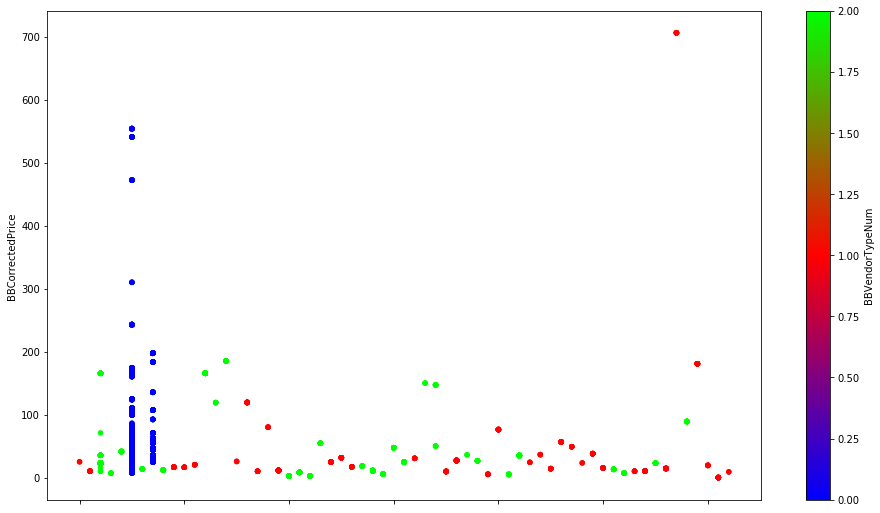

In [30]:
df.plot(x='BBVendorNum',y='BBCorrectedPrice',c='BBVendorTypeNum',kind='scatter', colormap='brg',figsize=(16,9))

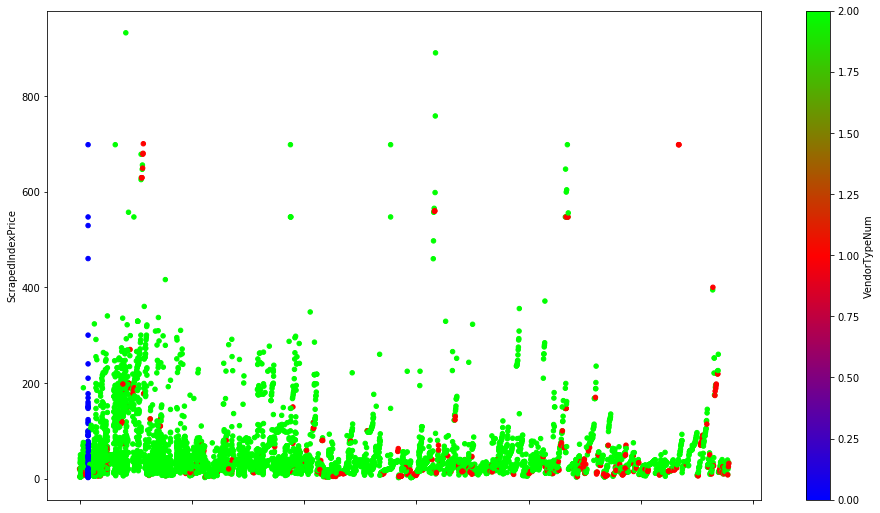

In [31]:
df.plot(x='VendorNum',y='ScrapedIndexPrice',c='VendorTypeNum',kind='scatter', colormap='brg',figsize=(16,9))

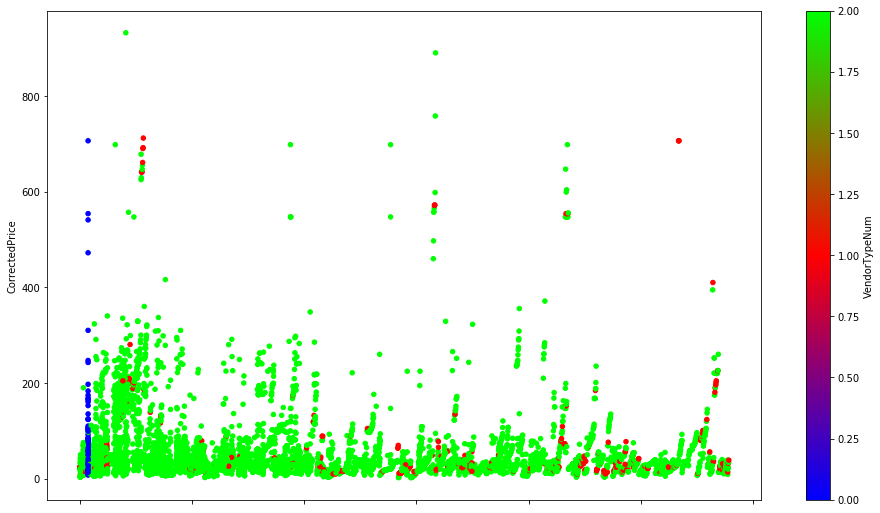

In [32]:
df.plot(x='VendorNum',y='CorrectedPrice',c='VendorTypeNum',kind='scatter', colormap='brg',figsize=(16,9))

#### 4. Rank vs Price relation

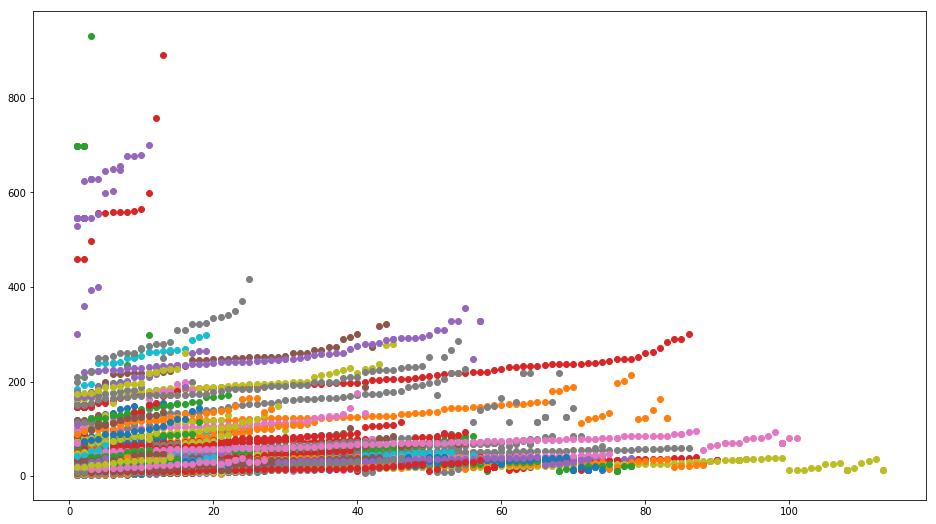

In [33]:
# initial rank vs initial price: amazon's algorithm
test = df[df.BBGroup == 0]
plt.figure(figsize=(16,9))
for i in range(1,max(df.BBGroup)+1):
    test = df[df.BBGroup == i]
    a = pd.DataFrame([test.ScrapedIndexTrueRank,test.ScrapedIndexPrice]).T
    #plt.plot(a['ScrapedIndexTrueRank'],a['ScrapedIndexPrice'])
    plt.scatter(a['ScrapedIndexTrueRank'],a['ScrapedIndexPrice'])

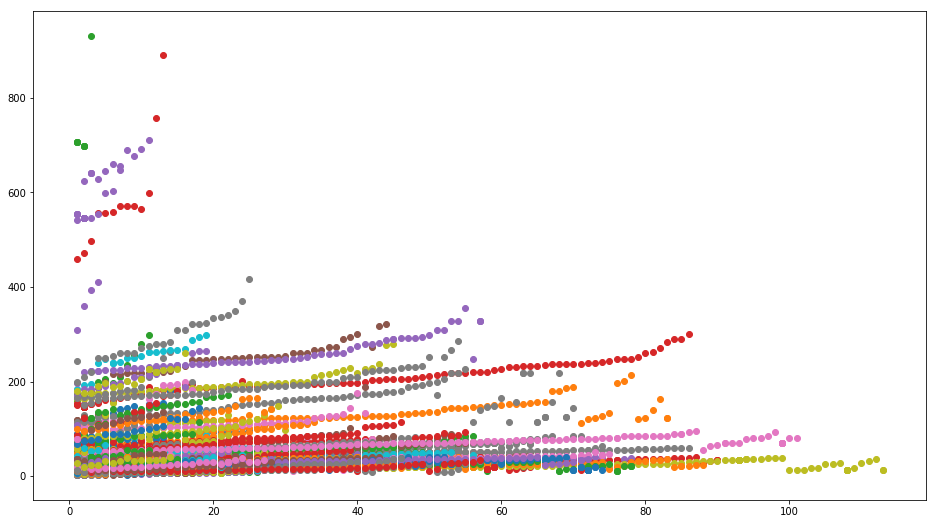

In [34]:
# initial rank vs true price
test = df[df.BBGroup == 0]
plt.figure(figsize=(16,9))
for i in range(1,max(df.BBGroup)+1):
    test = df[df.BBGroup == i]
    a = pd.DataFrame([test.ScrapedIndexTrueRank,test.CorrectedPrice]).T
    #plt.plot(a['ScrapedIndexTrueRank'],a['CorrectedPrice'])
    plt.scatter(a['ScrapedIndexTrueRank'],a['CorrectedPrice'])

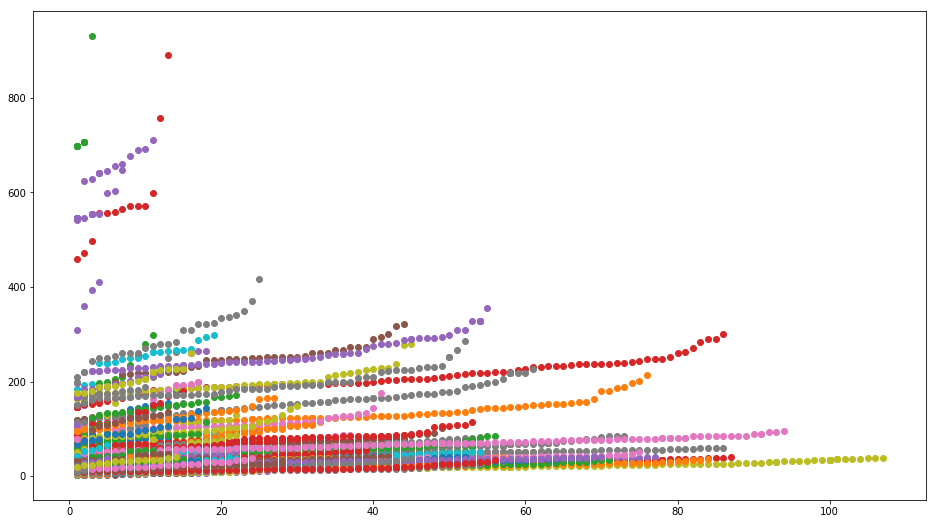

In [35]:
# corrected rank based on corrected price
test = df[df.BBGroup == 0]
plt.figure(figsize=(16,9))
for i in range(1,max(df.BBGroup)+1):
    test = df[df.BBGroup == i]
    a = pd.DataFrame([test.CorrectedIndexTrueRank,test.CorrectedPrice]).T
    #plt.plot(a['ScrapedIndexTrueRank'],a['CorrectedPrice'])
    plt.scatter(a['CorrectedIndexTrueRank'],a['CorrectedPrice'])

Error rate: 0.4768211920529801


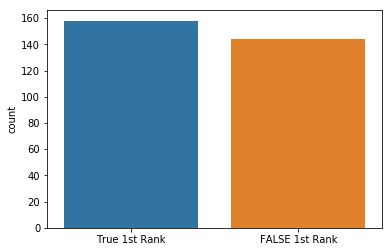

In [36]:
# initial rank vs corrected rank
test = df[df.BBGroup == 0]
temp = []
for i in range(1,max(df.BBGroup)+1):
    test = df[df.BBGroup == i]
    a = pd.DataFrame([test.ScrapedIndexTrueRank,test.CorrectedIndexTrueRank]).T
    for j in test.loc[test.ScrapedIndexTrueRank == 1]['CorrectedIndexTrueRank']:
        if j ==1:
            temp.append('True 1st Rank')
        else:
            temp.append('FALSE 1st Rank')
sns.countplot(temp)
print('Error rate: {}'.format(temp.count('FALSE 1st Rank')/len(temp))) #almost 50% is inaccurate
# results seems that amazon's ranking system doesn't means the actual lowest price

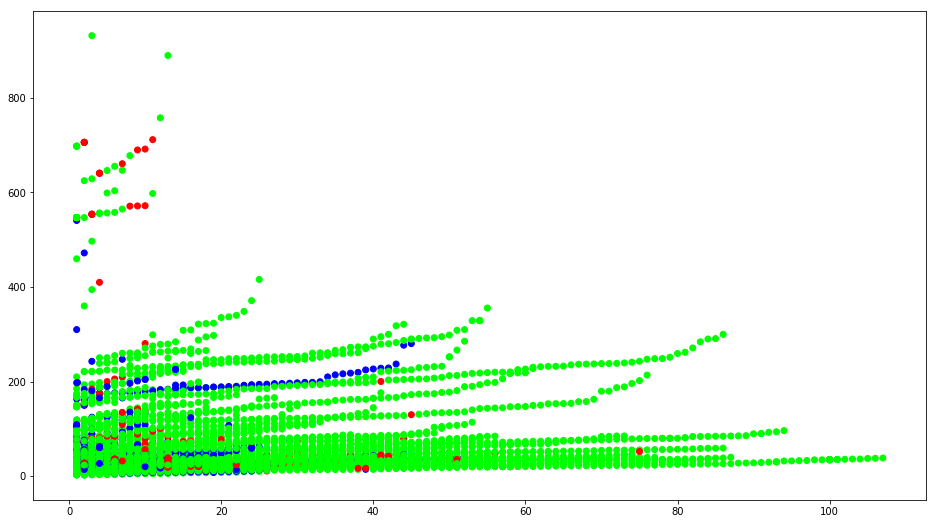

In [37]:
test = df[df.BBGroup == 0]
plt.figure(figsize=(16,9))
for i in range(1,max(df.BBGroup)+1):
    test = df[df.BBGroup == i]
    a = pd.DataFrame([test.CorrectedIndexTrueRank,test.CorrectedPrice,test.VendorTypeNum]).T
    plt.scatter(x=a['CorrectedIndexTrueRank'],y=a['CorrectedPrice'],c = a['VendorTypeNum'],cmap='brg')

#### 5. making simple prediction model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

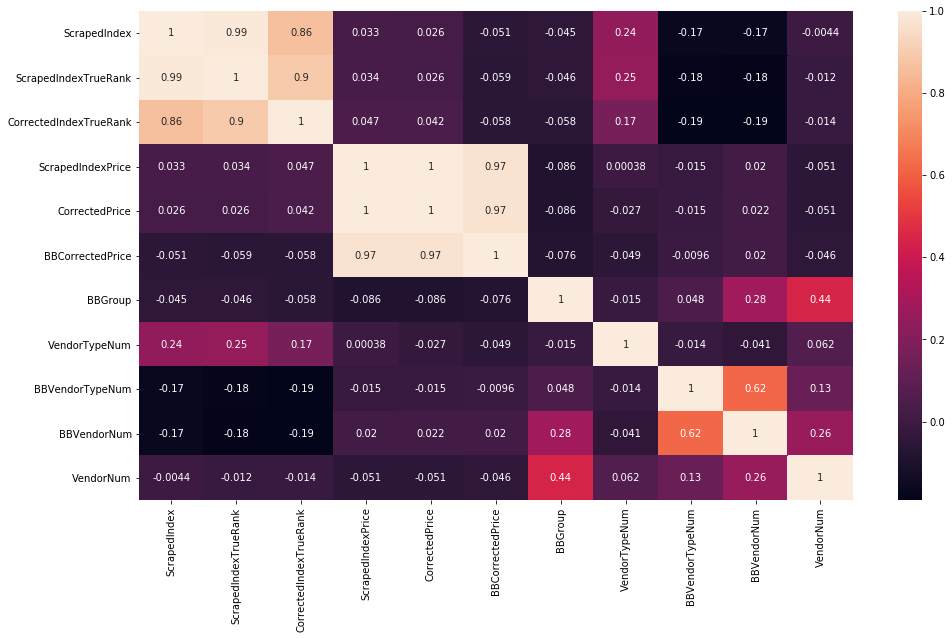

In [39]:
# correlation map for regression
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [40]:
feature_cols = ['BBGroup','VendorNum','VendorTypeNum','CorrectedIndexTrueRank','ScrapedIndex']
X = df[feature_cols]
y = df['CorrectedPrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99) #99 arbitrary

In [42]:
X_train.mean()

BBGroup                   120.104226
VendorNum                 950.106521
VendorTypeNum               1.883152
CorrectedIndexTrueRank     21.507363
ScrapedIndex               24.882004
dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

74.69391919259213
[-8.69284258e-02 -1.12808885e-04 -6.49200896e+00  2.13341080e-01
 -4.87710557e-02]


In [45]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

71.04709113687704
0.013448707667070403


In [46]:
# Find the average RMSE.
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

70.78796851172403

In [47]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)

y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

71.04709113687704
0.013448707667070403


In [48]:
# Find the average RMSE.
scores = cross_val_score(ridgereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

70.78796851172402

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [51]:
knn.score(X,y)

1.0

In [52]:
knnscores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-knnscores))

95.04734279816739

In [53]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

51.685881221669725
1.0
0.477879293030518


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [56]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
2,VendorTypeNum,0.005514
3,CorrectedIndexTrueRank,0.033391
4,ScrapedIndex,0.043668
1,VendorNum,0.147339
0,BBGroup,0.770089


In [57]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.9485315990686629


91.25658478943767

#### 6. flask application

In [58]:
import pickle

In [59]:
PREDICTOR = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1).fit(X,y)

In [60]:
with open('project_rfr.pkl', 'wb') as picklefile:
    pickle.dump(PREDICTOR, picklefile)

In [61]:
PREDICTOR.predict(np.array([[0,0,2,1,2]]))[0]

18.8233333333333

In [62]:
PREDICTOR.oob_score_

0.9485315990686629